In [155]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [156]:
df = pd.read_csv('../dataset/Delhi.csv')
df.head()

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
0,10500000,1200,Sector 10 Dwarka,2,1,0,1,0,0,1,...,1,0,1,0,0,0,0,0,0,0
1,6000000,1000,Uttam Nagar,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,15000000,1350,Sarita Vihar,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2500000,435,Uttam Nagar,2,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,5800000,900,Dwarka Mor,3,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4998 entries, 0 to 4997
Data columns (total 40 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Price                4998 non-null   int64 
 1   Area                 4998 non-null   int64 
 2   Location             4998 non-null   object
 3   No. of Bedrooms      4998 non-null   int64 
 4   Resale               4998 non-null   int64 
 5   MaintenanceStaff     4998 non-null   int64 
 6   Gymnasium            4998 non-null   int64 
 7   SwimmingPool         4998 non-null   int64 
 8   LandscapedGardens    4998 non-null   int64 
 9   JoggingTrack         4998 non-null   int64 
 10  RainWaterHarvesting  4998 non-null   int64 
 11  IndoorGames          4998 non-null   int64 
 12  ShoppingMall         4998 non-null   int64 
 13  Intercom             4998 non-null   int64 
 14  SportsFacility       4998 non-null   int64 
 15  ATM                  4998 non-null   int64 
 16  ClubHo

In [158]:
print(df.shape)
print(df['Location'].nunique())
print(df['Location'].unique())

(4998, 40)
339
['Sector 10 Dwarka' 'Uttam Nagar' 'Sarita Vihar' 'Dwarka Mor'
 'Sector 7 Dwarka' 'Sector 6 Dwarka' 'Sector 5 Dwarka' 'Sector 23 Rohini'
 'Mayur Vihar II' 'Sector 24 Rohini' 'Sector 11 Dwarka' 'Sector 23 Dwarka'
 'Sector 12 Dwarka' 'West End' 'Sector 9 Rohini' 'Mundka'
 'Sector 13 Rohini' 'Jamia Nagar' 'Sector 19 Dwarka' 'Sector 17 Dwarka'
 'Bindapur' 'Sector-18 Dwarka' 'Vasant Kunj' 'Shastri Nagar'
 'Sector-8 Rohini' 'Sector 9 Dwarka' 'Shanti Park Dwarka' 'Govindpuri'
 'Sector 22 Dwarka' 'Matiala' 'Saket' 'Mahavir Enclave' 'Burari'
 'Shahdara' 'Babarpur' 'Khanpur' 'Sector 13 Dwarka' 'Mansa Ram Park'
 'Green Park' 'Kalkaji' 'Sector 4 Dwarka' 'DLF Phase 5' 'Sector 3 Dwarka'
 'Chittaranjan Park' 'Chattarpur' 'Greater Kailash' 'Sector-14 Rohini'
 'Paschim Vihar' 'Pitampura' 'Sector 18B Dwarka' 'Sector 2 Dwarka'
 'Jasola' 'Pochanpur Colony' 'Palam' 'Saidabad' 'Budh Vihar'
 'Sector 25 Rohini' 'Sector 18A Dwarka' 'Sewak Park' 'Sector 23B Dwarka'
 'Rohini sector 24' 'Sector 28 R

In [159]:
df["Location"] = df["Location"].str.strip()

In [160]:
df = df.drop_duplicates()

In [161]:
df.isnull().sum()

Price                  0
Area                   0
Location               0
No. of Bedrooms        0
Resale                 0
MaintenanceStaff       0
Gymnasium              0
SwimmingPool           0
LandscapedGardens      0
JoggingTrack           0
RainWaterHarvesting    0
IndoorGames            0
ShoppingMall           0
Intercom               0
SportsFacility         0
ATM                    0
ClubHouse              0
School                 0
24X7Security           0
PowerBackup            0
CarParking             0
StaffQuarter           0
Cafeteria              0
MultipurposeRoom       0
Hospital               0
WashingMachine         0
Gasconnection          0
AC                     0
Wifi                   0
Children'splayarea     0
LiftAvailable          0
BED                    0
VaastuCompliant        0
Microwave              0
GolfCourse             0
TV                     0
DiningTable            0
Sofa                   0
Wardrobe               0
Refrigerator           0


In [162]:
df.shape

(4109, 40)

#### Dropping irrelevent features

In [163]:
df = df.drop(columns=['LandscapedGardens', 'JoggingTrack','RainWaterHarvesting', 'IndoorGames', 'Intercom', 'ATM', 'ClubHouse', 'PowerBackup', 'MultipurposeRoom', "Children'splayarea", 'BED', 'VaastuCompliant', 'Microwave', 'GolfCourse'])
print(df.shape)

(4109, 26)


#### Combining multiple features into one

In [164]:
df["Furnished"] = df["AC"] + df["DiningTable"] + df["Refrigerator"] + df["Sofa"] + df["TV"] + df["Wardrobe"] + df["WashingMachine"] + df["Wifi"] + df["Gasconnection"]

df = df.drop(columns=['TV', 'DiningTable', 'Sofa', 'Wardrobe', 'Refrigerator', 'WashingMachine', 'Gasconnection', 'AC', 'Wifi'])

df.head()

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,ShoppingMall,SportsFacility,School,24X7Security,CarParking,StaffQuarter,Cafeteria,Hospital,LiftAvailable,Furnished
0,10500000,1200,Sector 10 Dwarka,2,1,0,1,0,0,1,0,1,1,0,0,0,1,1
1,6000000,1000,Uttam Nagar,3,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,15000000,1350,Sarita Vihar,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2500000,435,Uttam Nagar,2,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,5800000,900,Dwarka Mor,3,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [165]:
for col in df.columns:
  print(f'{col} : no. of unique vals = {df[col].nunique()}, vals = {df[col].unique()}')

Price : no. of unique vals = 724, vals = [ 10500000   6000000  15000000   2500000   5800000  15800000  15400000
  13500000   6500000  12500000  11000000  14800000   3300000 110000000
   5000000  17500000   3600000  16500000   2750000  23500000  16200000
   5500000   3621000   9200000  10400000   2350000   8000000   3500000
   8500000  45000000   2700000   4999000   4699000   3800000   3000000
   5100000   5499000  12800000  27500000  16800000   3900000   4400000
   2900000   2100000   6200000   4011000   5300000   2400000  14500000
   4500000  16000000   6400000  35000000  10000000   2300000   6900000
   2800000 162500000   7500000  26000000   5200000  18000000  15500000
   8200000   4799000  14000000   3200000   6600000   6800000   2650000
  22500000  28500000   3399000   2349000   3199000   4099000   5999000
   2299000  18900000  17400000  13400000  16399999  19200000   2600000
  17000000  13000000  18300000  19000000  24000000  19500000   4700000
   4200000  13799999  18500000  1720

In [166]:
df[["MaintenanceStaff", "Gymnasium", "SwimmingPool", "ShoppingMall", "SportsFacility", "School", "24X7Security", "CarParking", "StaffQuarter", "Cafeteria", "Hospital", "LiftAvailable", "Furnished"]] = df[["MaintenanceStaff", "Gymnasium", "SwimmingPool", "ShoppingMall", "SportsFacility", "School", "24X7Security", "CarParking", "StaffQuarter", "Cafeteria", "Hospital", "LiftAvailable", "Furnished"]].replace(9, pd.NA)

In [167]:
df = df.dropna()

In [168]:
print(df.shape)
print(df.columns)

(1716, 18)
Index(['Price', 'Area', 'Location', 'No. of Bedrooms', 'Resale',
       'MaintenanceStaff', 'Gymnasium', 'SwimmingPool', 'ShoppingMall',
       'SportsFacility', 'School', '24X7Security', 'CarParking',
       'StaffQuarter', 'Cafeteria', 'Hospital', 'LiftAvailable', 'Furnished'],
      dtype='object')


#### Label encoding the "Location" feature

In [169]:
# df = pd.get_dummies(df, columns=['Location'], drop_first=True)

label_encoder = LabelEncoder()
df['Location'] = label_encoder.fit_transform(df['Location'])

#### Correlation

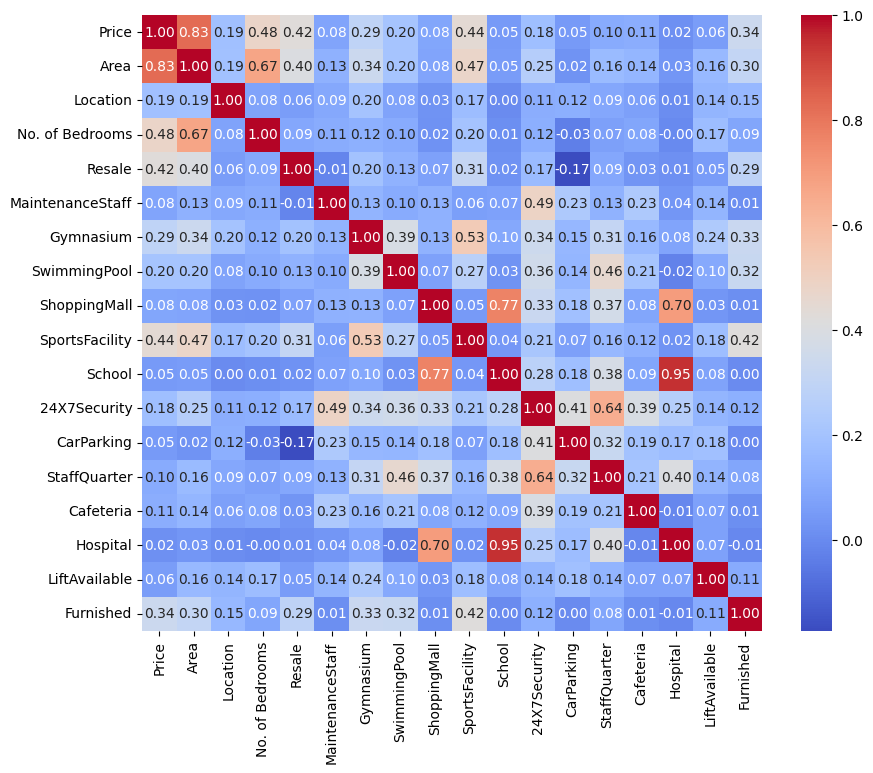

In [170]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

#### Train test split

In [171]:
X = df.drop('Price', axis=1)
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### LinearRegression

In [172]:
model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Metrics
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2score = r2_score(y_test, y_pred)
print("mean_squared_error:",mse)
print("root_mean_squared_error:",rmse)
print("r2_score:",r2score)

mean_squared_error: 31586567991637.89
root_mean_squared_error: 5620192.87850852
r2_score: 0.6443830890173667


#### RandomForestRegressor with GridSearchCV

In [173]:
rf = RandomForestRegressor()

param_grid = {
  'n_estimators': [100, 200],
  'max_depth': [10, 20, None],
  'min_samples_split': [2, 5]
}

grid_search = GridSearchCV(rf, param_grid, cv=3, n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [10, 20, None],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]})

In [174]:
grid_search.best_params_

{'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 200}

In [175]:
best_rf = grid_search.best_estimator_

y_pred_rf = best_rf.predict(X_test)

# Metrics
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = mse_rf ** 0.5
r2score_rf = r2_score(y_test, y_pred_rf)
print("mean_squared_error:",mse_rf)
print("root_mean_squared_error:",rmse_rf)
print("r2_score:",r2score_rf)

mean_squared_error: 24369869085805.19
root_mean_squared_error: 4936584.7593052825
r2_score: 0.72563218746527


In [176]:
pd.DataFrame(X_train).head()

,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,ShoppingMall,SportsFacility,School,24X7Security,CarParking,StaffQuarter,Cafeteria,Hospital,LiftAvailable,Furnished
785,1650,68,3,1,1,1,0,0,1,0,0,0,0,0,0,1,1
931,540,96,2,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1990,1050,21,2,1,0,1,0,0,0,0,0,0,0,0,0,0,1
1222,800,23,3,1,0,0,0,0,0,0,0,0,0,0,0,0,1
1058,800,11,3,0,0,0,0,0,0,0,0,1,0,0,0,1,0


#### Prediction of new data

In [177]:
new_data = pd.DataFrame({
  'Area': [1100], 
  'Location': [10], 
  'No. of Bedrooms': [3], 
  'Resale': [0],
  'MaintenanceStaff': [0], 
  'Gymnasium': [0], 
  'SwimmingPool': [0], 
  'ShoppingMall': [0],
  'SportsFacility': [0], 
  'School': [0], 
  '24X7Security': [0], 
  'CarParking': [0],
  'StaffQuarter': [0], 
  'Cafeteria': [0], 
  'Hospital': [0], 
  'LiftAvailable': [0], 
  'Furnished': [1]
})

predicted_price = best_rf.predict(new_data)
print(f'Predicted Price: {predicted_price}')

predicted_price_lr = model.predict(new_data)
print(f'Predicted Price LR: {predicted_price_lr}')

Predicted Price: [6903043.46626984]
Predicted Price LR: [7917393.61006761]


In [178]:
feature_importances = best_rf.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)
print(importance_df)

             Feature  Importance
0               Area    0.845024
1           Location    0.086597
3             Resale    0.019959
16         Furnished    0.015598
2    No. of Bedrooms    0.012550
15     LiftAvailable    0.004865
8     SportsFacility    0.004826
11        CarParking    0.002748
6       SwimmingPool    0.001995
5          Gymnasium    0.001707
4   MaintenanceStaff    0.001223
10      24X7Security    0.000999
13         Cafeteria    0.000614
12      StaffQuarter    0.000474
9             School    0.000411
7       ShoppingMall    0.000397
14          Hospital    0.000014


#### Saving the model

In [179]:
import joblib

joblib.dump(model, 'linear_regression_model.pkl')
joblib.dump(best_rf, 'random_forest_model.pkl')

['random_forest_model.pkl']